# Collection of First Runs on Dwave Pegasus

In this notebook, I  first explore the Pegasus topology, and later attempt to run several anneals. 

------- explanation -------

The dwave token (my token) is setup as a default for my personal laptop, i.e. running some parts of this notebook on a different device will require to provide your own token.


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler

In [59]:
dwave_sampler_pegasus = DWaveSampler(solver={'topology__type': 'pegasus'})
props_pegasus = dwave_sampler_pegasus.properties

# Get total qubits - should be 24 * N * (N - 1)
total_qubits = props_pegasus['num_qubits']
print('total qbits = ', total_qubits)

# Get total number of inactive qubits
total_inactive = [i for i in range(total_qubits) if i not in dwave_sampler_pegasus.nodelist]
print('total inactive qbits = ', len(total_inactive))

# another way to compute the number of active qubits
active_qubits = dwave_sampler_pegasus.solver.num_active_qubits
print('active qbits, another way = ', active_qubits)

# This should convert the known inactive qubit indices to Pegasus coordinates.
inactive_pegasus_coord = [dnx.pegasus_coordinates(16).linear_to_pegasus(k) for k in total_inactive]
print('inactive qbits cords', inactive_pegasus_coord)

total qbits =  5760
total inactive qbits =  133
active qbits, another way =  5627
inactive qbits cords [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 0, 4), (0, 0, 0, 5), (0, 0, 0, 6), (0, 0, 0, 7), (0, 0, 0, 8), (0, 0, 0, 9), (0, 0, 0, 10), (0, 0, 0, 11), (0, 0, 0, 12), (0, 0, 0, 13), (0, 0, 0, 14), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3), (0, 0, 1, 4), (0, 0, 1, 5), (0, 0, 1, 6), (0, 0, 1, 7), (0, 0, 1, 8), (0, 0, 1, 9), (0, 0, 1, 10), (0, 0, 1, 11), (0, 0, 1, 12), (0, 0, 1, 13), (0, 0, 1, 14), (0, 3, 0, 2), (0, 6, 8, 10), (0, 7, 5, 3), (0, 11, 5, 0), (0, 15, 10, 0), (0, 15, 10, 1), (0, 15, 10, 2), (0, 15, 10, 3), (0, 15, 10, 4), (0, 15, 10, 5), (0, 15, 10, 6), (0, 15, 10, 7), (0, 15, 10, 8), (0, 15, 10, 9), (0, 15, 10, 10), (0, 15, 10, 11), (0, 15, 10, 12), (0, 15, 10, 13), (0, 15, 10, 14), (0, 15, 11, 0), (0, 15, 11, 1), (0, 15, 11, 2), (0, 15, 11, 3), (0, 15, 11, 4), (0, 15, 11, 5), (0, 15, 11, 6), (0, 15, 11, 7), (0, 15, 11, 8), (0, 15, 11, 9), (0,

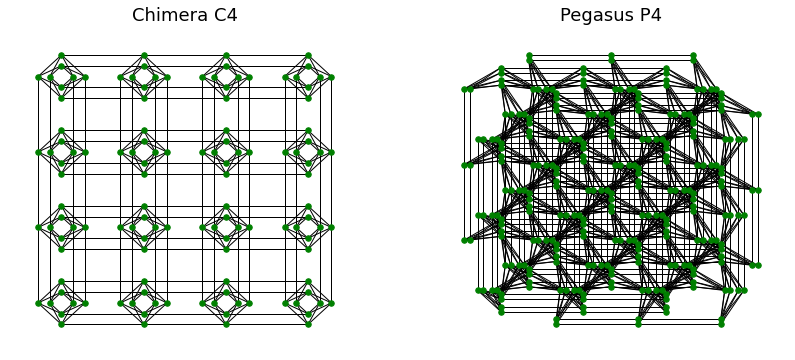

In [41]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(14,6))

dnx.draw_chimera(dnx.chimera_graph(4), ax=ax[0], node_size=30, node_color='g')
ax[0].set_title('Chimera C4', fontsize=18)

dnx.draw_pegasus(dnx.pegasus_graph(4), ax=ax[1], node_size=30, node_color='g')
ax[1].set_title('Pegasus P4', fontsize=18)

plt.savefig('chimera_pegasus_4.png',dpi=300)

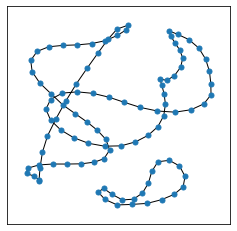

In [42]:
from embed_by_dwave import random_graph
import networkx as nx
import dimod 

G = random_graph(nodes=100, edges=2)

In [43]:
from embed_by_dwave import try_embedding
import minorminer

chimera_full = dnx.chimera_graph(16)
pegasus_full = dnx.pegasus_graph(16)

topologies_full = {'Chimera': chimera_full, 'Pegasus': pegasus_full}

try_embedding(source_graph=G, target_graphs=topologies_full, timeout=20, tries=2)

Chimera: found embedding with longest chain of 2 qubits.
Pegasus: found embedding with longest chain of 2 qubits.


{'Chimera': 2, 'Pegasus': 2}


Problem 1 of 2 for 10 nodes and 5 edges:


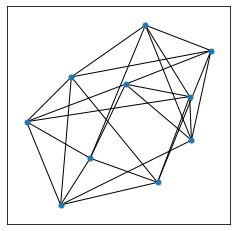

Chimera: found embedding with longest chain of 4 qubits.
Pegasus: found embedding with longest chain of 2 qubits.

Problem 2 of 2 for 10 nodes and 5 edges:


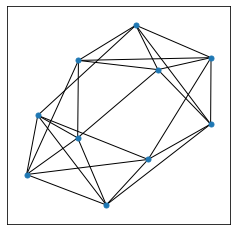

Chimera: found embedding with longest chain of 3 qubits.
Pegasus: found embedding with longest chain of 2 qubits.


[[10, 5, 0, {'Chimera': 4, 'Pegasus': 2}],
 [10, 5, 1, {'Chimera': 3, 'Pegasus': 2}]]

In [44]:
from embed_by_dwave import embedding_loop
import pandas as pd

embedding_loop(nodes=10,   # Additional configuration parameters are demonstrated below
               edges=5, 
               target_graphs=topologies_full)  

In [45]:
import os

from dwave.system.samplers import DWaveSampler
from dwave.cloud.exceptions import *

try:
    qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})
    qpu_2000q = DWaveSampler(solver={'topology__type': 'chimera'})
    
    qpus = {'Advantage': qpu_advantage, 'DW-2000Q': qpu_2000q}

    print("Connected to Advantage {} and 2000Q {}.".format(qpu_advantage.solver.id, qpu_2000q.solver.id))
except SolverNotFoundError:
    print("Currently a pair of solvers are unavailable for sections comparing QPU technologies. Try those examples later.")

Connected to Advantage Advantage_system4.1 and 2000Q DW_2000Q_6.


In [46]:
for qpu in qpus:
    topology = pegasus_full if qpu=="Advantage" else chimera_full
    qpu_yield = 100-round(100*(len(topology.nodes) - len(qpus[qpu].nodelist))/len(topology.nodes), 2)
    
    print("{} has a working graph with {}% yield.".format(qpus[qpu].solver.name, qpu_yield))

Advantage_system4.1 has a working graph with 99.77% yield.
DW_2000Q_6 has a working graph with 99.66% yield.


# Schedule

 1. Run Max-norm & EVM anneal separately
 
 2. Run PAPR
 
 3. Run together



## Minimising EVM:

After the message $\mathbf{s}$ is precoded into the precoded vector $\mathbf{x}$, we wirelessly transmit $F^\dagger\mathbf{x}$. This signal picks up environenmental artifacts, modeled by the channel matrix $H$ and so the received signal is a convolution of $H$ and the transmitted signal. After the reciever applies DFT, it reads $H\mathbf{x}$. As $H$ should only model the multipath environment, we may also model-in additional Gaussian noise $\mathbf{n}$ to the recieved vector, i.e. the reciver reads:

\begin{equation}
    H\mathbf{x} + \mathbf{n}
\end{equation}

We would like this to be as similar to the original $\mathbf{s}$ as possible, hence minimising:

\begin{equation}
    \Vert H\mathbf{x} + \mathbf{n} - \mathbf{s}\Vert_2^2
\end{equation}

In [60]:
def Channel_Rayleigh(no_users, no_transmit, scale=None):
    """Returns a random, complex Rayleigh fading wireles channel 
    matrix of size (no_users, no_transmit). 
    
    'no_users = NK and no_transmit = NM', but N can really be set to 1.
    
    NOTE: For testing, specify seed globally when calling this.
    """
    
    if scale is None:
        scale = 1
    else:
        None
    
    re_H = np.random.rayleigh(scale, (no_users, no_transmit))
    im_H = np.random.rayleigh(scale, (no_users, no_transmit))
    
    H = re_H + im_H*1J
    
    return H

def Gauss_noise(length, scale=None):
    
    if scale is None:
        scale=0.1
    else:
        None
    
    noise_re = np.random.normal(loc = 0, scale = np.sqrt(scale/2), size = (length,))
    noise_im = np.random.normal(loc = 0, scale = np.sqrt(scale/2), size = (length,))
    
    noise = noise_re + noise_im * 1j
    
    return noise


## We only need the coeffs.

In [61]:
## END GOAL: create class for coeffs. for user requested EVM size

def Get_EVM_coeffs(s):

    
    
    return coeffs

## Max-norm 

Minimising the max-norm can be written as the linear program:

\begin{align*}
    &\text{minimise }\;\; \mu \\
    &\text{s.t. }\;\; \alpha_j^2 + \beta_j^2 \leq \mu, \;\; \forall j=1,\dots, L
\end{align*}

where $\alpha_j$ is the real and $\beta_j$ the imaginary part of $y_j$, which is the time-domain of the precoded vector $\mathbf{x}$. The minimisation variable $\mu$ is given in a binary expansion as:

\begin{equation}
    \mu = \sum_{l=-r_\mu}^{r_\mu}2^{p^{(\mu)}_l}q_l.
\end{equation}

<!-- Notice that $\mu$ is now strictly positive and we can construct it in the following way. Suppose we want it to lie within $\mu\in [0, \mu_{max})$ and have $2n$ available qubits to to represent it with. Then, we approximate $\mu$ as:

\begin{equation}
    \mu = \sum_{l=-}^{r_\mu}2^{p^{(\mu)}_l}q_l.
\end{equation} -->

In [62]:
# upper bounary a power of 2 only
# expect nq+1 qubits

def Get_mu_coeff(mu_max, nq):
    """
    Works best for mu_max being a power of 2.
    """
    
    p_max = int(np.log2(mu_max) - 1)
    sub = int(nq/2) - p_max
    
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
    powers = powers - sub
    
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    return coeff, upper

# format(6, '01b')
# int(f'{5:03b}')
print(Get_mu_coeff(4,6))


(array([0.03125, 0.0625 , 0.125  , 0.25   , 0.5    , 1.     , 2.     ]), 3.96875)


Any other ancillary variable can be added via the above function.

The precoded vector $\mathbf{x}$ is likewise represented as an array of coeffciecients. 

For an $L$-long $\mathbf{x}$, we cerate an $2L$-long array: $[\Re(\mathbf{x}), \Im(\mathbf{x})]$, where each of the entries has the same range:

\begin{align}
    a_j \bigg/ b_j = \sum_{k=0}^{r_x}2^{p^{(x)}_k}q_k - c_xq_{r_x+1}.
\end{align}

which determines $c_x$ and $p^{(x)}$. 

The approach is almost identical as for $\mu$ coefficients. We assume that the domain of $\mathbf{x}$ is dependent on the size of the QAM constellation. 

First, determine the size of the QUBO matrix.


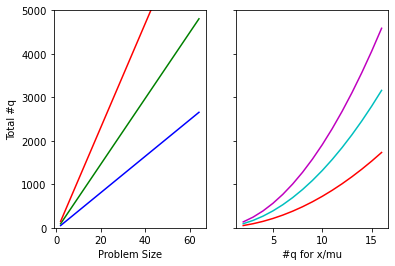

In [63]:
def Max_norm_q_count(problem_size, x_nq, mu_nq):
    qtot = (x_nq + 1)*(problem_size*(5*x_nq + 4) - 4*(x_nq + 1)) + 2*mu_nq
    return qtot


L = np.linspace(2,64, 63)
x_nq = np.linspace(2,16,15)
mu_nq = np.linspace(2,16,15)

cs = ['b','g','r','c','m','k']

%matplotlib inline


fig, (ax1, ax2) = plt.subplots(1, 2)
for i in range(0,3):
    ax1.plot(L,Max_norm_q_count(L,x_nq[i],x_nq[i]),c=cs[i])
    ax2.plot(x_nq,Max_norm_q_count(L[i],x_nq,x_nq),c=cs[i+2])
ax1.set_ylim(0,5000)
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Total #q')

ax2.set_ylim(0,5000)
# ax2.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xlabel('#q for x/mu')

plt.show()


In [64]:
from scipy import optimize

print(Max_norm_q_count(L[10], x_nq[2],x_nq[2]))

def best(x):
    L, x_nq = x
    return (Max_norm_q_count(L,x_nq,x_nq) - 5000)**2


resbrute = optimize.brute(best, ((2,64),(2,4)), full_output=True)

print(resbrute[0])
print(resbrute[1])

1348.0
[43.01701214  3.96604324]
3.0236442556626215e-16


In [65]:
%matplotlib inline
def Get_x_coeff(domain, size, nq):
    
    low, high = domain
    nq = nq - 2
    p_max = int(np.log2(high) - 1)
    sub = int(nq/2) - p_max
#     print(sub)
    
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
#     print(powers)
    powers = powers - sub
    
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    c = -(upper - low)
    
    # now coeff is an array of coeffs for a single element of x.
    coeff = np.append(coeff,c)
    
    # but we have 'size' of them
    coeff = np.tile(coeff, (size, 1))
    
    return coeff, upper


x_qubits = Get_x_coeff([-4,4], 2, 4)[0]
print(x_qubits)

[[ 0.5  1.   2.  -7.5]
 [ 0.5  1.   2.  -7.5]]


### L2 Norm

The l2 norm reads:

\begin{align}
    \Vert\mathbf{x}\Vert_2^2&= \sum_{n}^L(a_n^2+b_n^2)\nonumber\\
    &=\sum_{k=0}^{r}2^{2p_k}\sum_n^L(q_{a_n,k}+q_{b_n,k}) + \sum_n^L\sum_{k=0}^{r}\sum_{k<l}2^{p_k+p_l}(q_{a_n,k}q_{a_n,l}+q_{b_n,k}q_{b_n,l}) \nonumber\\
    &\quad - 2c\sum_n^L\left((q_{a_n,r+1}+q_{b_n,r+1})\sum_{k=0}^{r}2^{p_k}(q_{a_n,k}+q_{b_n,k})\right)+ c^2\sum_n^L(q_{a_n,r+1}+q_{b_n,r+1})
\end{align}


In [66]:
def Get_L2_QUBO_Coeff(x):
    """
    Given an array 'x' of coefficients of the real and imaginarry parts of x,
    return the QUBO coefficients as a 2D array (QUBO matrix).
    """
    
    # each row of input x should be coeffs of single a/b
    # so the QUBO matrix should be len(row)*num. rows
    num_q = len(x[0])
    Q_size = len(x)*num_q
    
    Q_mat = np.zeros((Q_size,Q_size))
    
    # 1st order terms - biases go on diagonal
    # compute diag for a single row, as they are all the same
    num_pos = num_q - 1
    
    diag = np.power(x[:],2)
    diag = np.tile(diag, Q_size)
    
    # inserting them on the diag
    np.fill_diagonal(Q_mat,diag)
    
    # 2nd order terms:
    
    
    
    return Q_mat

Qmat = Get_L2_QUBO_Coeff(x_qubits)

print(np.diag(Qmat))


[ 0.25  1.    4.   56.25  0.25  1.    4.   56.25]


In [67]:
import sympy as sp

q_a = sp.symbols('qa:5')
nq=3
varname = 'qbit'
q_b = sp.symbols('{}:{}'.format(varname,nq))

print(q_a)
print(q_b)

# TODO: make b**2=b for all symbols.
print(q_b[0]**2)


# s = sp.Sum(sp.Indexed('q_a',i),(i,0,4))
# s = sp.Sum(q_a[i], (i,0,2)).doit()

s = sp.Add(*[2**(m-4)*q_a[m] for m in range(5)])
print(s)


(qa0, qa1, qa2, qa3, qa4)
(qbit0, qbit1, qbit2)
qbit0**2
0.0625*qa0 + 0.125*qa1 + 0.25*qa2 + 0.5*qa3 + qa4


In [68]:

def Bin_Approx_Symbolic(name, domain, nq):
    
    low, high = domain
    
    # for now, to match the nq requirement
    nq = nq - 2
    
    # Largest power and the offset
    p_max = int(np.log2(high) - 1)
    sub = int(nq/2) - p_max
    
    # Powers of the binary vars
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
    powers = powers - sub
    
    # array of coefficients i.e. 2**powers
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    c = -(upper - low)
    
    # now coeff is an array of coeffs for a single element of x.
    coeff = np.append(coeff,c)
    
    # Create bin vars symbolically
    varname = 'q'+str(name)+'_'
    qname = sp.symbols('{}:{}'.format(varname,nq+2))
    qname = np.array(list(qname))
    
    # Create the symbolic sum
    elements = coeff*qname
    bin_approx = sp.Add(*[elements[j] for j in range(len(elements))])
    
    return bin_approx

print(Bin_Approx_Symbolic('a',[-4,4],6))

0.125*qa_0 + 0.25*qa_1 + 0.5*qa_2 + 1.0*qa_3 + 2.0*qa_4 - 7.875*qa_5


In [69]:
sp.expand(Bin_Approx_Symbolic('a',[-4,4],6)**2)

0.015625*qa_0**2 + 0.0625*qa_0*qa_1 + 0.125*qa_0*qa_2 + 0.25*qa_0*qa_3 + 0.5*qa_0*qa_4 - 1.96875*qa_0*qa_5 + 0.0625*qa_1**2 + 0.25*qa_1*qa_2 + 0.5*qa_1*qa_3 + 1.0*qa_1*qa_4 - 3.9375*qa_1*qa_5 + 0.25*qa_2**2 + 1.0*qa_2*qa_3 + 2.0*qa_2*qa_4 - 7.875*qa_2*qa_5 + 1.0*qa_3**2 + 4.0*qa_3*qa_4 - 15.75*qa_3*qa_5 + 4.0*qa_4**2 - 31.5*qa_4*qa_5 + 62.015625*qa_5**2

In [72]:
# With the above, we can define (a bin approx of) real valued vector

# init_printing(use_unicode=True)

a = sp.Matrix(sp.symbols('a:2'))

for i in range(len(a)):
    a[i] = Bin_Approx_Symbolic(str(a[i]),[-4,4],6)

a


Matrix([
[0.125*qa0_0 + 0.25*qa0_1 + 0.5*qa0_2 + 1.0*qa0_3 + 2.0*qa0_4 - 7.875*qa0_5],
[0.125*qa1_0 + 0.25*qa1_1 + 0.5*qa1_2 + 1.0*qa1_3 + 2.0*qa1_4 - 7.875*qa1_5]])

In [73]:
a.T*a

Matrix([[62.015625*(0.0158730158730159*qa0_0 + 0.0317460317460317*qa0_1 + 0.0634920634920635*qa0_2 + 0.126984126984127*qa0_3 + 0.253968253968254*qa0_4 - qa0_5)**2 + 62.015625*(0.0158730158730159*qa1_0 + 0.0317460317460317*qa1_1 + 0.0634920634920635*qa1_2 + 0.126984126984127*qa1_3 + 0.253968253968254*qa1_4 - qa1_5)**2]])

In [74]:
def Create_Xtilde_Sym(length, domain, nq):
    
    a = sp.Matrix(sp.symbols('a:{}'.format(int(length))))
    b = sp.Matrix(sp.symbols('b:{}'.format(int(length))))
    
    for i in range(length):
        a[i] = Bin_Approx_Symbolic(str(a[i]), domain, nq)
        b[i] = Bin_Approx_Symbolic(str(b[i]), domain, nq)
    
    x = a.col_join(b)

    return x

In [278]:
x= Create_Xtilde_Sym(2,[-4,4],4)
x

Matrix([
[0.5*qa0_0 + 1.0*qa0_1 + 2.0*qa0_2 - 7.5*qa0_3],
[0.5*qa1_0 + 1.0*qa1_1 + 2.0*qa1_2 - 7.5*qa1_3],
[0.5*qb0_0 + 1.0*qb0_1 + 2.0*qb0_2 - 7.5*qb0_3],
[0.5*qb1_0 + 1.0*qb1_1 + 2.0*qb1_2 - 7.5*qb1_3]])

In [76]:
len(x.T*x)

1

In [270]:
def L2_Sym(x):
    return x.T*x

In [279]:
l2norm = L2_Sym(x)
sp.expand(l2norm)

Matrix([[0.25*qa0_0**2 + 1.0*qa0_0*qa0_1 + 2.0*qa0_0*qa0_2 - 7.5*qa0_0*qa0_3 + 1.0*qa0_1**2 + 4.0*qa0_1*qa0_2 - 15.0*qa0_1*qa0_3 + 4.0*qa0_2**2 - 30.0*qa0_2*qa0_3 + 56.25*qa0_3**2 + 0.25*qa1_0**2 + 1.0*qa1_0*qa1_1 + 2.0*qa1_0*qa1_2 - 7.5*qa1_0*qa1_3 + 1.0*qa1_1**2 + 4.0*qa1_1*qa1_2 - 15.0*qa1_1*qa1_3 + 4.0*qa1_2**2 - 30.0*qa1_2*qa1_3 + 56.25*qa1_3**2 + 0.25*qb0_0**2 + 1.0*qb0_0*qb0_1 + 2.0*qb0_0*qb0_2 - 7.5*qb0_0*qb0_3 + 1.0*qb0_1**2 + 4.0*qb0_1*qb0_2 - 15.0*qb0_1*qb0_3 + 4.0*qb0_2**2 - 30.0*qb0_2*qb0_3 + 56.25*qb0_3**2 + 0.25*qb1_0**2 + 1.0*qb1_0*qb1_1 + 2.0*qb1_0*qb1_2 - 7.5*qb1_0*qb1_3 + 1.0*qb1_1**2 + 4.0*qb1_1*qb1_2 - 15.0*qb1_1*qb1_3 + 4.0*qb1_2**2 - 30.0*qb1_2*qb1_3 + 56.25*qb1_3**2]])

In [280]:
expandednorm = sp.expand(l2norm)[0]
expandednorm = sp.Poly(expandednorm)
expandednorm

Poly(0.25*qa0_0**2 + 1.0*qa0_0*qa0_1 + 2.0*qa0_0*qa0_2 - 7.5*qa0_0*qa0_3 + 1.0*qa0_1**2 + 4.0*qa0_1*qa0_2 - 15.0*qa0_1*qa0_3 + 4.0*qa0_2**2 - 30.0*qa0_2*qa0_3 + 56.25*qa0_3**2 + 0.25*qa1_0**2 + 1.0*qa1_0*qa1_1 + 2.0*qa1_0*qa1_2 - 7.5*qa1_0*qa1_3 + 1.0*qa1_1**2 + 4.0*qa1_1*qa1_2 - 15.0*qa1_1*qa1_3 + 4.0*qa1_2**2 - 30.0*qa1_2*qa1_3 + 56.25*qa1_3**2 + 0.25*qb0_0**2 + 1.0*qb0_0*qb0_1 + 2.0*qb0_0*qb0_2 - 7.5*qb0_0*qb0_3 + 1.0*qb0_1**2 + 4.0*qb0_1*qb0_2 - 15.0*qb0_1*qb0_3 + 4.0*qb0_2**2 - 30.0*qb0_2*qb0_3 + 56.25*qb0_3**2 + 0.25*qb1_0**2 + 1.0*qb1_0*qb1_1 + 2.0*qb1_0*qb1_2 - 7.5*qb1_0*qb1_3 + 1.0*qb1_1**2 + 4.0*qb1_1*qb1_2 - 15.0*qb1_1*qb1_3 + 4.0*qb1_2**2 - 30.0*qb1_2*qb1_3 + 56.25*qb1_3**2, qa0_0, qa0_1, qa0_2, qa0_3, qa1_0, qa1_1, qa1_2, qa1_3, qb0_0, qb0_1, qb0_2, qb0_3, qb1_0, qb1_1, qb1_2, qb1_3, domain='RR')

In [281]:
variables = expandednorm.args[1:]
variables

(qa0_0,
 qa0_1,
 qa0_2,
 qa0_3,
 qa1_0,
 qa1_1,
 qa1_2,
 qa1_3,
 qb0_0,
 qb0_1,
 qb0_2,
 qb0_3,
 qb1_0,
 qb1_1,
 qb1_2,
 qb1_3)

In [282]:
variables = np.array(list(variables))

def Quad2Lin(x):
    
    x = sp.Poly(x)
    variables = x.args[1:]
    
    for q in variables:
        x = x.subs(q**2,q)
    return x
expandednorm = Quad2Lin(expandednorm)
expandednorm

1.0*qa0_0*qa0_1 + 2.0*qa0_0*qa0_2 - 7.5*qa0_0*qa0_3 + 0.25*qa0_0 + 4.0*qa0_1*qa0_2 - 15.0*qa0_1*qa0_3 + 1.0*qa0_1 - 30.0*qa0_2*qa0_3 + 4.0*qa0_2 + 56.25*qa0_3 + 1.0*qa1_0*qa1_1 + 2.0*qa1_0*qa1_2 - 7.5*qa1_0*qa1_3 + 0.25*qa1_0 + 4.0*qa1_1*qa1_2 - 15.0*qa1_1*qa1_3 + 1.0*qa1_1 - 30.0*qa1_2*qa1_3 + 4.0*qa1_2 + 56.25*qa1_3 + 1.0*qb0_0*qb0_1 + 2.0*qb0_0*qb0_2 - 7.5*qb0_0*qb0_3 + 0.25*qb0_0 + 4.0*qb0_1*qb0_2 - 15.0*qb0_1*qb0_3 + 1.0*qb0_1 - 30.0*qb0_2*qb0_3 + 4.0*qb0_2 + 56.25*qb0_3 + 1.0*qb1_0*qb1_1 + 2.0*qb1_0*qb1_2 - 7.5*qb1_0*qb1_3 + 0.25*qb1_0 + 4.0*qb1_1*qb1_2 - 15.0*qb1_1*qb1_3 + 1.0*qb1_1 - 30.0*qb1_2*qb1_3 + 4.0*qb1_2 + 56.25*qb1_3

In [283]:
expandednorm= sp.Poly(expandednorm)
expandednorm
# expandednorm.coeffs()

Poly(1.0*qa0_0*qa0_1 + 2.0*qa0_0*qa0_2 - 7.5*qa0_0*qa0_3 + 0.25*qa0_0 + 4.0*qa0_1*qa0_2 - 15.0*qa0_1*qa0_3 + 1.0*qa0_1 - 30.0*qa0_2*qa0_3 + 4.0*qa0_2 + 56.25*qa0_3 + 1.0*qa1_0*qa1_1 + 2.0*qa1_0*qa1_2 - 7.5*qa1_0*qa1_3 + 0.25*qa1_0 + 4.0*qa1_1*qa1_2 - 15.0*qa1_1*qa1_3 + 1.0*qa1_1 - 30.0*qa1_2*qa1_3 + 4.0*qa1_2 + 56.25*qa1_3 + 1.0*qb0_0*qb0_1 + 2.0*qb0_0*qb0_2 - 7.5*qb0_0*qb0_3 + 0.25*qb0_0 + 4.0*qb0_1*qb0_2 - 15.0*qb0_1*qb0_3 + 1.0*qb0_1 - 30.0*qb0_2*qb0_3 + 4.0*qb0_2 + 56.25*qb0_3 + 1.0*qb1_0*qb1_1 + 2.0*qb1_0*qb1_2 - 7.5*qb1_0*qb1_3 + 0.25*qb1_0 + 4.0*qb1_1*qb1_2 - 15.0*qb1_1*qb1_3 + 1.0*qb1_1 - 30.0*qb1_2*qb1_3 + 4.0*qb1_2 + 56.25*qb1_3, qa0_0, qa0_1, qa0_2, qa0_3, qa1_0, qa1_1, qa1_2, qa1_3, qb0_0, qb0_1, qb0_2, qb0_3, qb1_0, qb1_1, qb1_2, qb1_3, domain='RR')

In [83]:
def separate(expression, variables):
    
    L = []
    Q = []
    print(len(variables))
    for i in range(len(variables)):
        L.append(expression.coeff_monomial(variables[i]))
        for j in range(i+1,len(variables)):
            Q.append(expression.coeff_monomial(variables[i]*variables[j]))
    
    L = np.array(L, dtype=float)
    Q = np.array(Q, dtype=float)
    
    return L,Q

separate(expandednorm,variables)

16


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  1. ,   2. ,  -7.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   4. , -15. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. , -30. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          1. ,   2. ,  -7.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   4. , -15. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. , -30. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   1. ,   2. ,  -7.5,   0. ,   0. ,   0. ,   0. ,
          4. , -15. ,   0. ,   0. ,   0. ,   0. , -30. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   2. ,  -7.5,
   

In [320]:
varib = expandednorm.args[1:]
# print(varib)
# expandednorm.monoms()
# new = expandednorm.as_expr()
# one, two = new.as_independent(varib[0])
# two
# print(new.args[1:])
# new.coeff(varib[0], 1)
# expandednorm.args[1:][0]

In [299]:
def Create_Qubo(expression):
    
    expression = sp.Poly(expression)
    variables = expression.args[1:]
    
    Qubo = sp.zeros(len(variables))
    
    print(r'Creating a {}x{} upper-triangular QUBO matrix..'.format(len(variables), len(variables)))
    
    for i in range(len(variables)):
        Qubo[i,i] = expression.coeff_monomial(variables[i])
        for j in range(i+1,len(variables)):
            Qubo[i,j] = expression.coeff_monomial(variables[i]*variables[j])
    
    return Qubo

Qubo_L2 = Create_Qubo(expandednorm)
Qubo_L2

Creating a 16x16 upper-triangular QUBO matrix..


Matrix([
[0.25, 1.0, 2.0,  -7.5,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0, 1.0, 4.0, -15.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0, 4.0, -30.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0, 56.25,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0, 0.25, 1.0, 2.0,  -7.5,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0,    0, 1.0, 4.0, -15.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0,    0,   0, 4.0, -30.0,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0,    0,   0,   0, 56.25,  0.0, 0.0, 0.0,   0.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0,    0,   0,   0,     0, 0.25, 1.0, 2.0,  -7.5,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0,    0,   0,   0,     0,    0, 1.0, 4.0, -15.0,  0.0, 0.0, 0.0,   0.0],
[   0,   0,   0,     0,    0,   0,   0,     0,    0

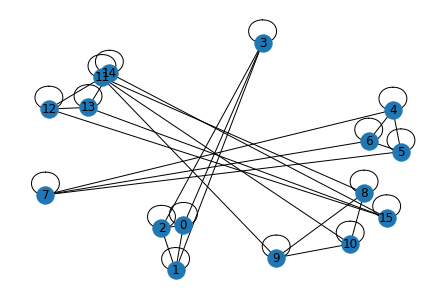

In [300]:
import networkx as nx

Qubo_L2 = np.array(Qubo_L2, dtype=float)

G = nx.from_numpy_matrix(Qubo_L2)
nx.draw(G, with_labels=True)

In [85]:
# same as Bin_Approx_imbolic so.. ignore
def Bin_Slack(name, domain, nq):
        
    low, high = domain
    
    # for now, to match the nq requirement
    nq = nq - 2
    
    # Largest power and the offset
    p_max = int(np.log2(high) - 1)
    sub = int(nq/2) - p_max
    
    # Powers of the binary vars
    powers = np.linspace(-int(nq/2), int(nq/2), nq+1, dtype=int)
    powers = powers - sub
    
    # array of coefficients i.e. 2**powers
    coeff = 2*np.ones(nq+1)
    coeff = np.power(coeff, powers)
    
    upper = np.sum(coeff)
    
    c = -(upper - low)
    
    # now coeff is an array of coeffs for a single element of x.
    coeff = np.append(coeff,c)
    
    # Create bin vars symbolically
    varname = 'q'+str(name)+'_'
    qname = sp.symbols('{}:{}'.format(varname,nq+2))
    qname = np.array(list(qname))
    
    # Create the symbolic sum
    elements = coeff*qname
    bin_approx = sp.Add(*[elements[j] for j in range(len(elements))])

    return bin_approx

mu = Bin_Slack('mu', [0,4], 8)
mu

0.03125*qmu_0 + 0.0625*qmu_1 + 0.125*qmu_2 + 0.25*qmu_3 + 0.5*qmu_4 + 1.0*qmu_5 + 2.0*qmu_6 - 3.96875*qmu_7

<!-- EVM as:
\begin{align*}
    (\mathbf{Hx}+\mathbf{n} - \mathbf{s})^2 = (\mathbf{Hx} - \mathbf{s'})^2 \equiv \Vert\mathbf{Hx} - \mathbf{s'}\Vert_2^2.
\end{align*}
As before, we split the real and imaginary parts as follows:
\begin{align}
    \Tilde{\mathbf{H}}\mathbf{\Tilde{x}}-\Tilde{\mathbf{s'}}=\begin{bmatrix}
    \Re(\mathbf{H}) & -\Im(\mathbf{H}) \\ \Im(\mathbf{H}) & \Re(\mathbf{H})\end{bmatrix}\begin{bmatrix}
    \Re(\mathbf{x})\\\Im(\mathbf{x})
    \end{bmatrix} - \begin{bmatrix}\Re(\mathbf{s'})\\\Im(\mathbf{s'})\end{bmatrix}.
\end{align} -->

In [326]:
np.random.randint(1, high=4, size=10, dtype=int)

array([1, 3, 2, 1, 2, 2, 1, 1, 3, 1])

In [330]:
import random
[random.randrange(1,4,2) for p in range(0,10)]

[1, 1, 1, 1, 3, 3, 1, 3, 3, 1]

In [86]:
from sympy.physics.quantum import TensorProduct
def EVM_Sym(x, s):
    
    no_users = int(len(s))
    no_transmit = int(len(x)/2)
   
    s_im = s.imag
    s_re = s.real
    
    s = sp.Matrix(np.concatenate((s_re,s_im)))
    
    H = sp.Matrix(Channel_Rayleigh(no_users, no_transmit))
    
    T = sp.ones(2)
    T[0,1] = -1
    ID = sp.eye(2)
    T = T-ID
#     print(T)
    
    H_re = sp.re(H)
    H_im = sp.im(H)
#     print(H_im)
    
#     H = sp.Matrix(TensorProduct(T,H))
    H = sp.Matrix(TensorProduct(T, H_im)) + sp.Matrix(TensorProduct(ID, H_re))
#     H = sp.Matrix(sp.BlockMatrix([H_re, -H_im, H_im, H_re]))
    
    n = Gauss_noise(no_users)
    n = sp.Matrix(np.concatenate((n.real,n.imag)))
    
    EVM_pen = H*x + n - s
    EVM = EVM_pen.T*EVM_pen
    
    return EVM


s = np.array([1+1J, 3-3J,])
EVM = EVM_Sym(x,s)[0]
sp.expand(EVM)

1.58393823448053*qa0_0**2 + 6.33575293792212*qa0_0*qa0_1 + 12.6715058758442*qa0_0*qa0_2 - 47.5181470344159*qa0_0*qa0_3 + 4.17054485274011*qa0_0*qa1_0 + 8.34108970548021*qa0_0*qa1_1 + 16.6821794109604*qa0_0*qa1_2 - 62.5581727911016*qa0_0*qa1_3 - 1.77635683940025e-15*qa0_0*qb0_3 - 0.851438436019264*qa0_0*qb1_0 - 1.70287687203853*qa0_0*qb1_1 - 3.40575374407706*qa0_0*qb1_2 + 12.771576540289*qa0_0*qb1_3 - 3.35649785796169*qa0_0 + 6.33575293792212*qa0_1**2 + 25.3430117516885*qa0_1*qa0_2 - 95.0362940688318*qa0_1*qa0_3 + 8.34108970548021*qa0_1*qa1_0 + 16.6821794109604*qa0_1*qa1_1 + 33.3643588219208*qa0_1*qa1_2 - 125.116345582203*qa0_1*qa1_3 - 3.5527136788005e-15*qa0_1*qb0_3 - 1.70287687203853*qa0_1*qb1_0 - 3.40575374407706*qa0_1*qb1_1 - 6.81150748815411*qa0_1*qb1_2 + 25.5431530805779*qa0_1*qb1_3 - 6.71299571592338*qa0_1 + 25.3430117516885*qa0_2**2 - 190.072588137664*qa0_2*qa0_3 + 16.6821794109604*qa0_2*qa1_0 + 33.3643588219208*qa0_2*qa1_1 + 66.7287176438417*qa0_2*qa1_2 - 250.232691164406*qa0_2

In [87]:
EVM = sp.Poly(EVM)


In [88]:
import scipy as sc

def Max_Norm_LP_Constraint_Sym(x, mu):
    
    size = int(len(x)/2)
    
    F = np.around(sc.linalg.dft(size), decimals=4)
    F = F.T.conj()
    F = sp.Matrix(F)
    
    # Create re/im block matrix
    F_re = sp.re(F)
    F_im = sp.im(F)
    
    T = sp.ones(2)
    T[0,1] = -1
    ID = sp.eye(2)
    T = T - ID
    
    F = sp.Matrix(TensorProduct(T, F_im)) + sp.Matrix(TensorProduct(ID, F_re))
    
    # Time array y:
    y = F*x
    
    # put all constraints in a list (sum them later)
    constraint = list(sp.symbols('C:{}'.format(size)))
    print(constraint)
    
    for i in range(len(constraint)):
        constraint[i] = sp.Pow(y[i],2) + sp.Pow(y[i+size],2) - mu
        constraint[i] = sp.expand(constraint[i])
        constraint[i] = Quad2Lin(constraint[i])
        
        constraint[i] = sp.Pow(constraint[i],2)
        constraint[i] = sp.expand(constraint[i])
        constraint[i] = Quad2Lin(constraint[i])
    
    all_constraints = sp.Add(*[constraint[j] for j in range(len(constraint))])
    
    return all_constraints

max_constraint = Max_Norm_LP_Constraint_Sym(x, mu)
max_constraint

[C0, C1]


-360.0*qa0_0*qa0_1*qa0_2*qa0_3 + 84.0*qa0_0*qa0_1*qa0_2 + 540.0*qa0_0*qa0_1*qa0_3 + 12.0*qa0_0*qa0_1*qa1_0*qa1_1 + 24.0*qa0_0*qa0_1*qa1_0*qa1_2 - 90.0*qa0_0*qa0_1*qa1_0*qa1_3 + 3.0*qa0_0*qa0_1*qa1_0 + 48.0*qa0_0*qa0_1*qa1_1*qa1_2 - 180.0*qa0_0*qa0_1*qa1_1*qa1_3 + 12.0*qa0_0*qa0_1*qa1_1 - 360.0*qa0_0*qa0_1*qa1_2*qa1_3 + 48.0*qa0_0*qa0_1*qa1_2 + 675.0*qa0_0*qa0_1*qa1_3 + 4.0*qa0_0*qa0_1*qb0_0*qb0_1 + 8.0*qa0_0*qa0_1*qb0_0*qb0_2 - 30.0*qa0_0*qa0_1*qb0_0*qb0_3 + 1.0*qa0_0*qa0_1*qb0_0 + 16.0*qa0_0*qa0_1*qb0_1*qb0_2 - 60.0*qa0_0*qa0_1*qb0_1*qb0_3 + 4.0*qa0_0*qa0_1*qb0_1 - 120.0*qa0_0*qa0_1*qb0_2*qb0_3 + 16.0*qa0_0*qa0_1*qb0_2 + 225.0*qa0_0*qa0_1*qb0_3 + 4.0*qa0_0*qa0_1*qb1_0*qb1_1 + 8.0*qa0_0*qa0_1*qb1_0*qb1_2 - 30.0*qa0_0*qa0_1*qb1_0*qb1_3 + 1.0*qa0_0*qa0_1*qb1_0 + 16.0*qa0_0*qa0_1*qb1_1*qb1_2 - 60.0*qa0_0*qa0_1*qb1_1*qb1_3 + 4.0*qa0_0*qa0_1*qb1_1 - 120.0*qa0_0*qa0_1*qb1_2*qb1_3 + 16.0*qa0_0*qa0_1*qb1_2 + 225.0*qa0_0*qa0_1*qb1_3 - 0.125*qa0_0*qa0_1*qmu_0 - 0.25*qa0_0*qa0_1*qmu_1 - 0.5*qa0_0

In [89]:
## How to implement auxiliaries here?
#
# either:
# 1. from the start
# 2. or flexibly by going over an expression
#
# already know from theory which should be done. but then code not flexible for other problems.

In [90]:
max_constraint = sp.Poly(max_constraint)
monomials = max_constraint.monoms()
monomials[0]

(1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [91]:
# because output of .monoms() is ordered same way as .args[1:]
# we know which monomials appear.
#
# which have biggest overlap?:

In [92]:
from collections import Counter

def Add_Aux(poly):
    
    # just in case not Poly object
    poly = sp.Poly(poly)
    variables = poly.args[1:]
    
    monomials = poly.monoms()
    monomials = np.array(monomials)
    
    # find the high order monoms:
    trouble = np.count_nonzero(monomials, axis=1)
    trouble = np.argwhere(trouble > 2)
    highord = monomials[trouble][:,0]
    
    print(highord.shape)
    totals = np.sum(highord, axis=0)
    print(totals)
    
    # look which occur most freqently
    var_occur = np.argwhere(highord == 1)
    print(var_occur)
    
    # only need to look at the 'second' index
    var_occur = var_occur[:,1]
    total = Counter(var_occur)
    
    
    return total
Add_Aux(max_constraint)

(972, 24)
[200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200  24  24
  24  24  24  24  24  24]
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [971  14]
 [971  15]
 [971  23]]


Counter({0: 200,
         1: 200,
         2: 200,
         3: 200,
         4: 200,
         5: 200,
         6: 200,
         7: 200,
         8: 200,
         9: 200,
         10: 200,
         11: 200,
         12: 200,
         13: 200,
         14: 200,
         15: 200,
         16: 24,
         17: 24,
         18: 24,
         19: 24,
         20: 24,
         21: 24,
         22: 24,
         23: 24})

In [93]:
# could also go one monomial after another and quadratise each.. but then we need to update the entire polynomial
# every time - not very efficient for larger expressions.

In [101]:
# Sub auxiliaries based on theory:
# first connect all qubits of a's together, then also all of b's
max_constraint.args[1:]

(qa0_0,
 qa0_1,
 qa0_2,
 qa0_3,
 qa1_0,
 qa1_1,
 qa1_2,
 qa1_3,
 qb0_0,
 qb0_1,
 qb0_2,
 qb0_3,
 qb1_0,
 qb1_1,
 qb1_2,
 qb1_3,
 qmu_0,
 qmu_1,
 qmu_2,
 qmu_3,
 qmu_4,
 qmu_5,
 qmu_6,
 qmu_7)

In [168]:
def Aux_ab(poly):
    
    variables = poly.args[1:]
    
    # group them together - this requires knowing len(x) and nq_x TODO: handle in a class
    # do nq_x*len(x) = 4*2 in this case so:
    qubits_a, qubits_b = variables[:8], variables[8:16]
    
    
    # define all possible pairs to be replaced:
    combo_a, combo_b = list(itertools.combinations(qubits_a, 2)), list(itertools.combinations(qubits_b, 2))
    

    # define the auxiliares for each pair in combo_a & combo_b:
    combo_indices = np.array(list(itertools.combinations(range(len(qubits_a)),2)))
    
    z_a = []
    z_b = []
    
    #TODO: fix the names - for example za_14 is qa0_1*qa1_0, but the name does not indicate that
    for i,j in combo_indices:
        z_a.append(sp.symbols('za_{}'.format(str(i)+str(j))))
        z_b.append(sp.symbols('zb_{}'.format(str(i)+str(j))))
        

    # replace all instances of qa_i*qa_j with za_ij and extra constraint // same for b's:
    
    M = sp.symbols('M') # penalty constant
    
    replacements_a = [(combo_a[i][0]*combo_a[i][1], z_a[i]) for i in range(len(z_a))]
    
    penalties_a = [M*(combo_a[i][0]*combo_a[i][1] - 2*combo_a[i][0]*z_a[i] - 2*combo_a[i][1]*z_a[i] + 3*z_a[i])
                   for i in range(len(z_a))]
    
    replacements_b = [(combo_b[i][0]*combo_b[i][1], z_b[i]) for i in range(len(z_b))]
    
    penalties_b = [M*(combo_b[i][0]*combo_b[i][1] - 2*combo_b[i][0]*z_b[i] - 2*combo_b[i][1]*z_b[i] + 3*z_b[i])
                   for i in range(len(z_b))]
    
    penalties = sp.Add(*[penalties_a[j]+penalties_b[j] for j in range(len(penalties_a))])

    # do the substitutions:
    for i in range(len(qubits_a)):
        poly = poly.subs(replacements_a)
        poly = poly.subs(replacements_b)
        
    # add penalties to main polynomial:
    new_poly = poly + penalties
    
    return new_poly


new_poly = Aux_ab(max_constraint)


In [187]:
# of course first need to set M to something, then print this
qubo_max = Create_Qubo(new_poly)
qubo_max

Creating a 81x81 upper-triangular QUBO matrix..


Matrix([
[0.0,   0.0, 0.0,  0.0,      0.0,   0.0, 0.0,  0.0,      0.0,   0.0,   0.0,   0.0,      0.0,   0.0,   0.0,   0.0,      0.0,         0.0,       0.0,      0.0,     0.0,    0.0,    0.0,    0.0,          0.0,    3.0,    3.0,       3.0,   3.0,   3.0,   3.0,    3.0,    3.0,      3.0,   3.0,    3.0,    3.0,   3.0,      3.0,    3.0,    3.0,     3.0,    3.0,     3.0,      3.0,      3.0,      3.0,    3.0,    3.0,       3.0,     3.0,      3.0,     3.0,    3.0,    3.0,       3.0,   3.0,    3.0,    3.0,     3.0,    3.0,      3.0,    3.0,    3.0,    3.0,     3.0,      3.0,    3.0,    3.0,     3.0,      3.0,     3.0,      3.0,      3.0,      3.0,    3.0,    3.0,       3.0,     3.0,      3.0,     3.0],
[  0, 0.125, 0.0,  0.0,      0.0,   0.0, 0.0,  0.0,      0.0,  0.25,   1.0,   4.0,    56.25,  0.25,   1.0,   4.0,    56.25,    -0.03125,   -0.0625,   -0.125,   -0.25,   -0.5,   -1.0,   -2.0,      3.96875,    0.0,    0.0,       0.0,   0.0,   0.0,   0.0,    0.0,    0.0,      0.0,   0.0,    0.0,  

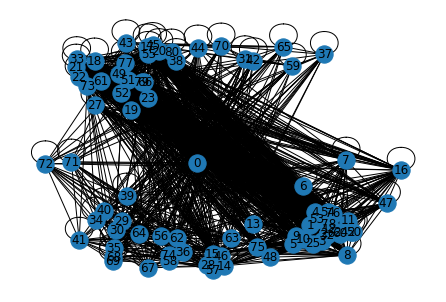

In [188]:
qubo_max = np.array(qubo_max, dtype=float)

G = nx.from_numpy_matrix(qubo_max)
nx.draw(G, with_labels=True)

In [ ]:
# find the high order monoms:
monomials = np.array(monomials)
trouble = np.count_nonzero(monomials, axis=1)
trouble = np.where(trouble>)

In [ ]:
d = np.array([[1,1,0,0],[1,1,1,0],[0,0,1,0]])
trouble = np.count_nonzero(d, axis=1)
trouble


In [176]:
from dwave.system.samplers import DWaveSampler
from dwave.system import EmbeddingComposite

# solver = DWaveSampler()
# sampler = EmbeddingComposite(solver)

# experiment = sampler.sample_qubo(f, g, num_reads = num_reads)

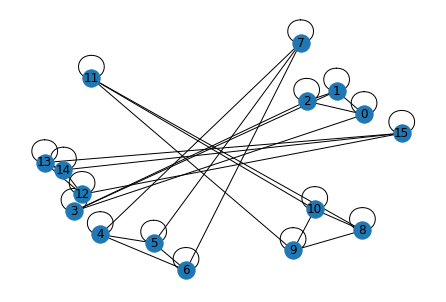

In [301]:
import networkx as nx

Qubo_L2 = np.array(Qubo_L2, dtype=float)

G = nx.from_numpy_matrix(Qubo_L2)
nx.draw(G, with_labels=True)

[[  0.25   1.     2.    -7.5 ]
 [  0.     1.     4.   -15.  ]
 [  0.     0.     4.   -30.  ]
 [  0.     0.     0.    56.25]]


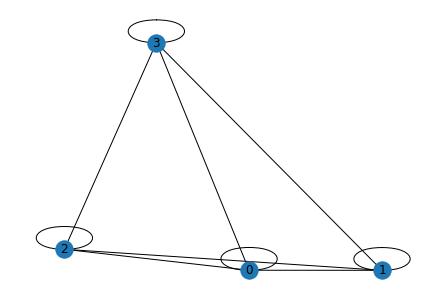

In [303]:
smaller = Qubo_L2[:4, :4]
print(smaller)

G = nx.from_numpy_matrix(smaller)
nx.draw(G, with_labels=True)

In [332]:
qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})

sampler = EmbeddingComposite(qpu_advantage)



# bqm = dimod.BinaryQuadraticModel.from_numpy_matrix(Qubo_L2)
bqm = dimod.BinaryQuadraticModel.from_qubo(Qubo_L2, offset=0)

result = sampler.sample(bqm,
               num_reads=10,
               auto_scale=True,
               return_embedding=True, 
#                chain_strength=chain_strengths[qpu],
               answer_mode='raw',
               label='L2 trial')
result

SampleSet(rec.array([([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 5.5 , 1, 0.),
           ([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 3.5 , 1, 0.),
           ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.  , 1, 0.),
           ([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 4.5 , 1, 0.),
           ([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 1.25, 1, 0.),
           ([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 1.75, 1, 0.),
           ([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 1.75, 1, 0.),
           ([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 1.5 , 1, 0.),
           ([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 6.25, 1, 0.),
           ([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 1.25, 1, 0.)],
          dtype=[('sample', 'i1', (16,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')]), Variables(range(0, 16)), {'timing': {'qpu_sampling_time': 1206.4, 'qpu_anneal_time_per_sample': 20.0, 'qp

In [333]:
import pandas as pd

resframe = pd.DataFrame(result.data_vectors)
resframe

,energy,num_occurrences,chain_break_fraction
0,5.50,1,0.0
1,3.50,1,0.0
2,0.00,1,0.0
3,4.50,1,0.0
4,1.25,1,0.0
5,1.75,1,0.0
6,1.75,1,0.0
7,1.50,1,0.0
8,6.25,1,0.0
9,1.25,1,0.0


In [334]:
# the configurations are given in
result.record

rec.array([([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 5.5 , 1, 0.),
           ([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 3.5 , 1, 0.),
           ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.  , 1, 0.),
           ([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 4.5 , 1, 0.),
           ([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 1.25, 1, 0.),
           ([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 1.75, 1, 0.),
           ([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 1.75, 1, 0.),
           ([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 1.5 , 1, 0.),
           ([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 6.25, 1, 0.),
           ([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 1.25, 1, 0.)],
          dtype=[('sample', 'i1', (16,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')])

In [335]:
qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus'})

sampler = EmbeddingComposite(qpu_advantage)



# bqm = dimod.BinaryQuadraticModel.from_numpy_matrix(Qubo_L2)
bqm = dimod.BinaryQuadraticModel.from_qubo(smaller, offset=0)

result_s = sampler.sample(bqm,
               num_reads=1000,
               auto_scale=True,
               return_embedding=True, 
#                chain_strength=chain_strengths[qpu],
               answer_mode='raw',
               label='L2 trial smaller')
# result

In [349]:
result_s.info

{'timing': {'qpu_sampling_time': 82000.0,
  'qpu_anneal_time_per_sample': 20.0,
  'qpu_readout_time_per_sample': 41.46,
  'qpu_access_time': 97067.16,
  'qpu_access_overhead_time': 4879.84,
  'qpu_programming_time': 15067.16,
  'qpu_delay_time_per_sample': 20.54,
  'post_processing_overhead_time': 1555.0,
  'total_post_processing_time': 1555.0},
 'problem_id': '3c359f6a-4a24-408e-8bfb-275558e17d21',
 'problem_label': 'L2 trial smaller',
 'embedding_context': {'embedding': {1: (4314,),
   0: (1807,),
   2: (4299,),
   3: (1822,)},
  'chain_break_method': 'majority_vote',
  'embedding_parameters': {},
  'chain_strength': 8.667060201201442}}

In [342]:
def plot_energies(results, title='Energy Distribution - Small L_2-norm Anneal'):
    energies = results.data_vectors['energy']
    occurrences = results.data_vectors['num_occurrences']
    counts = Counter(energies)
    total = sum(occurrences)
    counts = {}
    for index, energy in enumerate(energies):
        if energy in counts.keys():
            counts[energy] += occurrences[index]
        else:
            counts[energy] = occurrences[index]
    for key in counts:
        counts[key] /= total
    df = pd.DataFrame.from_dict(counts, orient='index').sort_index()
    df.plot(kind='bar', legend=None)

    plt.xlabel('Energy')
    plt.ylabel('Probabilities')
    plt.title(str(title))
    plt.show()
    print("minimum energy:", min(energies))

In [344]:
def plot_enumerate(results, title=None):

    plt.figure()

    energies = [datum.energy for datum in results.data(
        ['energy'], sorted_by=None)]
    
    if results.vartype == 'Vartype.BINARY':
        samples = [''.join(c for c in str(datum.sample.values()).strip(
            ', ') if c.isdigit()) for datum in results.data(['sample'], sorted_by=None)]
        plt.xlabel('bitstring for solution')
    else:
        samples = np.arange(len(energies))
        plt.xlabel('solution')

    plt.bar(samples,energies)
    plt.xticks(rotation=90)
    plt.ylabel('Energy')
    plt.title(str(title))
    print("minimum energy:", min(energies))

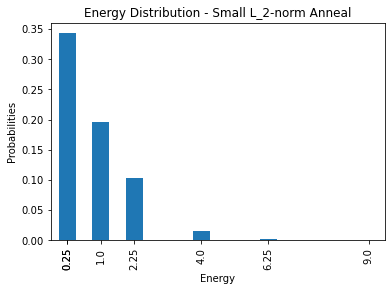

minimum energy: 0.0
minimum energy: 0.0


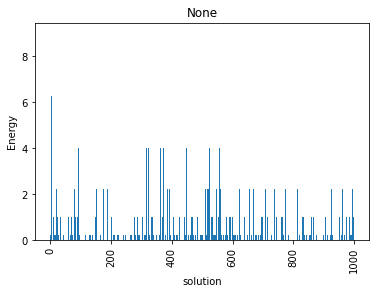

In [346]:
plot_energies(result_s)
plot_enumerate(result_s)

In [352]:
## try on small EVM
s = np.array([1+1J, 3-3J,])
EVM = EVM_Sym(x,s)[0]
EVM_quad = Quad2Lin(sp.expand(EVM))
EVM_qubo = Create_Qubo(EVM_quad)
EVM_qubo

Creating a 16x16 upper-triangular QUBO matrix..


Matrix([
[-6.64675926324251,  9.13557889024943,  18.2711577804989, -68.5168416768707,  3.64387421040271,  7.28774842080542,  14.5754968416108, -54.6581131560407,                  0.0,                 0.0,                0.0, -1.77635683940025e-15, -2.09240388105481, -4.18480776210961, -8.36961552421922,  31.3860582158221],
[                0, -8.72572908136031,  36.5423155609977, -137.033683353741,  7.28774842080542,  14.5754968416108,  29.1509936832217, -109.316226312081,                  0.0,                 0.0,                0.0,  -3.5527136788005e-15, -4.18480776210961, -8.36961552421922, -16.7392310484384,  62.7721164316442],
[                0,                 0, 0.819699617778241, -274.067366707483,  14.5754968416108,  29.1509936832217,  58.3019873664434, -218.632452624163,                  0.0,                 0.0,                0.0,   -7.105427357601e-15, -8.36961552421922, -16.7392310484384, -33.4784620968769,  125.544232863288],
[                0,                 0,     

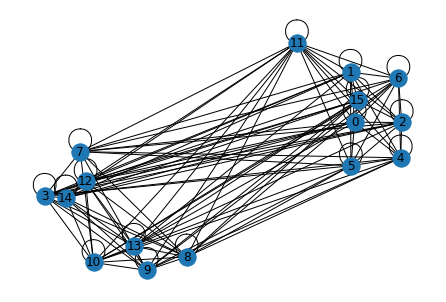

In [353]:
EVM_qubo_array = np.array(EVM_qubo, dtype=float)

G = nx.from_numpy_matrix(EVM_qubo_array)
nx.draw(G, with_labels=True)

In [354]:
bqm = dimod.BinaryQuadraticModel.from_qubo(EVM_qubo_array, offset=0)

result_EVM = sampler.sample(bqm,
               num_reads=1000,
               auto_scale=True,
               return_embedding=True, 
#                chain_strength=chain_strengths[qpu],
               answer_mode='raw',
               label='EVM trial')

In [355]:
result_EVM.info

{'timing': {'qpu_sampling_time': 120480.0,
  'qpu_anneal_time_per_sample': 20.0,
  'qpu_readout_time_per_sample': 79.94,
  'qpu_access_time': 135547.16,
  'qpu_access_overhead_time': 2864.84,
  'qpu_programming_time': 15067.16,
  'qpu_delay_time_per_sample': 20.54,
  'post_processing_overhead_time': 281.0,
  'total_post_processing_time': 281.0},
 'problem_id': 'a559b745-a029-4eaa-a1c2-86ee83cbe832',
 'problem_label': 'EVM trial',
 'embedding_context': {'embedding': {1: (1107, 1108),
   0: (1062, 5285),
   2: (1092, 1093),
   3: (5255, 1077),
   4: (5150, 5151),
   5: (5210, 1227),
   6: (5135, 5136),
   7: (1212, 5165),
   8: (1123, 1122),
   9: (1257, 1167, 5286),
   10: (1137, 1138),
   11: (5300, 1032, 5301),
   12: (5240,),
   13: (5270, 1047),
   14: (5195, 1152),
   15: (5225,)},
  'chain_break_method': 'majority_vote',
  'embedding_parameters': {},
  'chain_strength': 196.90786804789087}}

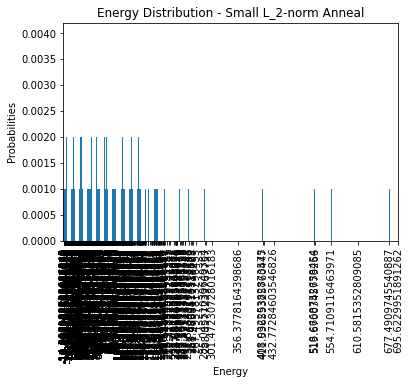

minimum energy: -14.864009293954055
minimum energy: -14.864009293954055


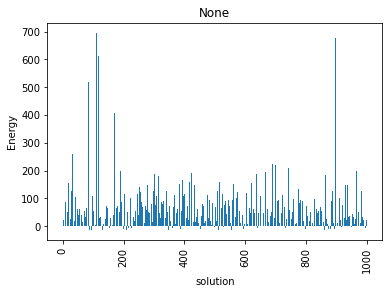

In [357]:
plot_energies(result_EVM)
plot_enumerate(result_EVM)

## PAPR

In [ ]:
x= np.array([1+2J, 3+4J])
np.fft.ifft(x)

In [ ]:
winv = np.array([[1,0],[0,-1]])
print(winv)
print(winv@x)

## Full Problem



The goal is to:
\begin{equation}
    \text{minimise }\; \frac{\Vert\mathbf{\mathbf{F}^H\mathbf{x}}\Vert_\infty^2}{\Vert\mathbf{\mathbf{x}}\Vert_2^2}, \;\; \text{such that}\;\; \left\Vert\mathbf{Hx - s}\right\Vert_2^2 \leq \epsilon, \;\;\text{or}\;\;  \mathbf{Hx}+\mathbf{n}\overset{!}{=}\mathbf{s} \label{eq: overall optimisation goal}
\end{equation}

Here, we try to combine the previous efforts.


## Convert M-QAM symbols into binary (unnecessary)

Every element in the message $\mathbf{s}$ of a $\lvert\Omega\rvert$-QAM constellation can be written as:

\begin{equation}
    s_j = \sum_{i=1}^{r_b} 2^{r_b - i + 1} q_{j + (i-1)N} - (\sqrt{\lvert\Omega\rvert} - 1),
\end{equation}

with  $r_b = \lceil\log\sqrt{\lvert\Omega}\rvert\rceil$ number of qubits 

In [ ]:
## SIDE NOTE: I don't need this actually

def QAM_to_Bin(s, order):
    """Take message 's' and convert it's elements into binary (QUBO) representation.
    Inputs:
        s : message; array of constellation symbols.
        order: QAM size.
        
    Returns:
        s_bin : binary rep of each element of s as an array of coefficients of each qubit.
    """
    
    # number of qubits per symbol
    num_qubits = np.ceil(np.log(np.sqrt(order)))
    
    # prepare output array
    s_bin = np.zeros((len(s), num_qubits))
    
    return s_bin